**SET UP - Import các thư viện cần thiết**

In [1]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**IMPORT DATA - Tạo DataFrame từ file .csv**

In [5]:
df_AI = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Tài liệu\DATA ANALYSTICS\DA_Final Project\Data sets\1. Project1_Data\Market_insights.csv", encoding='iso-8859-1')
df_jobs = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Tài liệu\DATA ANALYSTICS\DA_Final Project\Data sets\1. Project1_Data\AI.ML.Data _Salaries.csv")
df_Cities = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Tài liệu\DATA ANALYSTICS\DA_Final Project\Data sets\1. Project1_Data\worldcities.csv")

**Exploring the Data**

In [6]:
df_AI.columns.tolist()

['Job_Title',
 'Industry',
 'Company_Size',
 'Location',
 'AI_Adoption_Level',
 'Automation_Risk',
 'Required_Skills',
 'Salary_USD',
 'Remote_Friendly',
 'Job_Growth_Projection']

In [ ]:
df_AI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [ ]:
df_AI.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


In [ ]:
df_AI.isna().sum()

Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

In [ ]:
df_AI.duplicated().sum()

0

In [12]:
#xử lí giá trị ngoại lai
print('df_AI.shape trước khi xử lí:',df_AI.shape)
Q1 = df_AI['Salary_USD'].quantile(0.25)
Q3 = df_AI['Salary_USD'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = df_AI[(df_AI['Salary_USD'] >= lower_bound) &
                    (df_AI['Salary_USD'] <= upper_bound)]
df_AI = filtered_data
print('df_AI.shape sau khi xử lí:',df_AI.shape)

df_AI.shape trước khi xử lí: (500, 10)
df_AI.shape sau khi xử lí: (495, 10)


**df_jobs**

In [13]:
df_jobs.columns.tolist()

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [14]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57194 entries, 0 to 57193
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           57194 non-null  int64 
 1   experience_level    57194 non-null  object
 2   employment_type     57194 non-null  object
 3   job_title           57194 non-null  object
 4   salary              57194 non-null  int64 
 5   salary_currency     57194 non-null  object
 6   salary_in_usd       57194 non-null  int64 
 7   employee_residence  57194 non-null  object
 8   remote_ratio        57194 non-null  int64 
 9   company_location    57194 non-null  object
 10  company_size        57194 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.8+ MB


In [15]:
df_jobs.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,57194.000000,5.719400e+04,57194.000000,57194.000000
mean,2023.776305,1.641818e+05,159223.565829,22.211246
std,0.519883,2.060327e+05,72155.164297,41.424262
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.094000e+05,109300.000000,0.000000
50%,2024.000000,1.495520e+05,149040.000000,0.000000
75%,2024.000000,2.000000e+05,200000.000000,0.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [16]:
df_jobs.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [17]:
df_jobs.duplicated().sum()

29883

In [18]:
df_jobs[df_jobs.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
23,2024,SE,FT,Data Engineer,110000,USD,110000,US,0,US,M
124,2024,MI,FT,Software Engineer,118612,USD,118612,US,0,US,M
125,2024,MI,FT,Software Engineer,83028,USD,83028,US,0,US,M
128,2024,MI,FT,Software Engineer,118612,USD,118612,US,0,US,M
129,2024,MI,FT,Software Engineer,83028,USD,83028,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
56897,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
56982,2021,MI,FT,Data Scientist,150000,USD,150000,US,100,US,M
57036,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
57116,2021,EN,FT,Data Scientist,90000,USD,90000,US,100,US,S


In [19]:
# xử lí dữ liệu trùng lặp:
print('số dòng trùng lập:', df_jobs.duplicated().sum())
df_jobs = df_jobs.drop_duplicates(subset=['job_title', 'salary_in_usd'])
print('sau khi xử lí:', df_jobs.shape)

số dòng trùng lập: 29883
sau khi xử lí: (18083, 11)


In [20]:
#xử lí giá trị ngoại lai
print('df_jobs.shape trước khi xử lí:',df_jobs.shape)
Q1=df_jobs['salary_in_usd'].quantile(0.25)
Q3=df_jobs['salary_in_usd'].quantile(0.75)
IQR=Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5* IQR
filtered_data = df_jobs[(df_jobs['salary_in_usd'] >= lower_bound) &
(df_jobs['salary_in_usd'] <= upper_bound)]
df_jobs = filtered_data
print('df_jobs.shape sau khi xử lí:', df_jobs.shape)

df_jobs.shape trước khi xử lí: (18083, 11)
df_jobs.shape sau khi xử lí: (17700, 11)


**Global Salaries in AI, ML, Data Science (df_jobs)**

In [21]:
df_jobs.head() # Trước khi xử lí

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Developer,168276,USD,168276,US,0,US,M
1,2024,MI,FT,Developer,112184,USD,112184,US,0,US,M
2,2024,EN,FT,Developer,180000,USD,180000,US,0,US,M
3,2024,EN,FT,Developer,133500,USD,133500,US,0,US,M
4,2024,EN,FT,Developer,122000,USD,122000,US,0,US,M


In [22]:
# xóa cột, đổi tên cột
df_jobs.drop(columns=['salary', 'salary_currency', 'employee_residence'], inplace=True)
df_jobs.rename(columns={'remote_ratio': 'Remote_Friendly'}, inplace=True)

In [23]:
# Thay thế các giá trị trong cột
df_jobs['experience_level'].replace({'EN': 'Entry-level', 'MI': 'Mid-level', 'SE': 'Senior', 'EX': 'Expert'}, inplace=True)
df_jobs['employment_type'].replace({'FT': 'Full-Time', 'PT': 'Part-Time', 'CT': 'Contract', 'FL': 'Freelance'}, inplace=True)
df_jobs['Remote_Friendly'].replace({0: 'No', 50: 'Hybrid', 100: 'Yes'}, inplace=True)
df_jobs['company_size'].replace({'M': 'Medium', 'L': 'Large', 'S': 'Small'}, inplace=True)

In [24]:
df_jobs.head() # Sau khi xử lí

,work_year,experience_level,employment_type,job_title,salary_in_usd,Remote_Friendly,company_location,company_size
0,2024,Mid-level,Full-Time,Developer,168276,No,US,Medium
1,2024,Mid-level,Full-Time,Developer,112184,No,US,Medium
2,2024,Entry-level,Full-Time,Developer,180000,No,US,Medium
3,2024,Entry-level,Full-Time,Developer,133500,No,US,Medium
4,2024,Entry-level,Full-Time,Developer,122000,No,US,Medium


**Analysis and Visualization:**

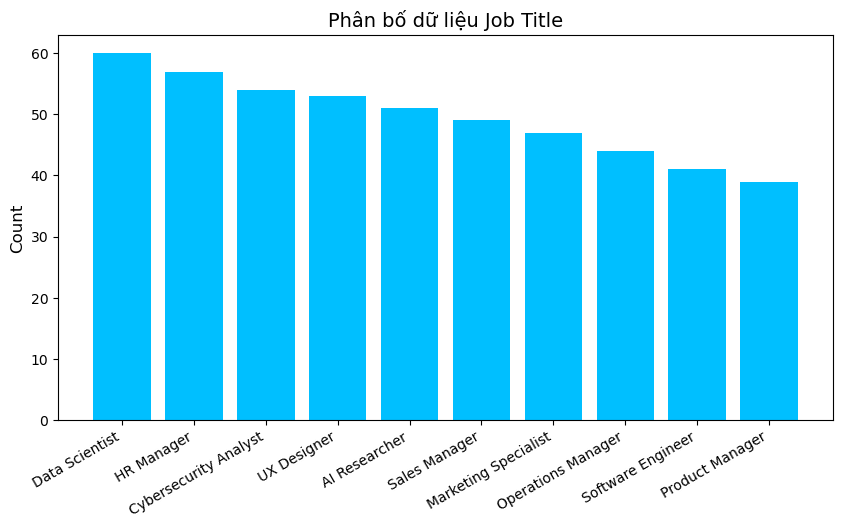

In [29]:
value_counts = df_AI['Job_Title'].value_counts().reset_index()
value_counts.columns = ['Job_Title', 'Count'] 

# Vẽ bar chart
plt.figure(figsize=(10,5))
plt.bar(value_counts['Job_Title'], value_counts['Count'], color='#00bfff')

plt.ylabel('Count', fontsize=12)
plt.title('Phân bố dữ liệu Job Title', fontsize=14)

#Khả năng làm việc từ xa theo Job_Title
plt.xticks (rotation=30, ha='right')
plt.show()

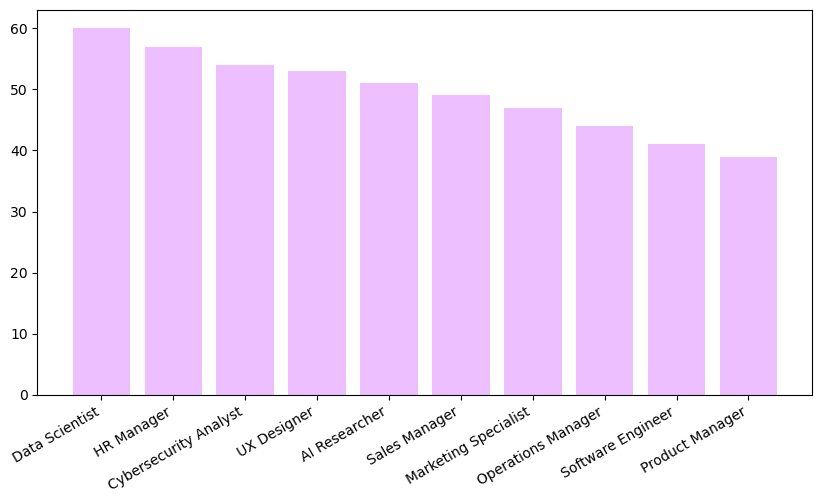

In [30]:
plt.figure(figsize=(10,5))
plt.bar(value_counts['Job_Title'], value_counts['Count'], color='#eebfff')

plt.ylabel #Đặt tiêu đề cho cột
plt.title #Đặt tiêu đề cho bảng
plt.xticks(rotation=30, ha='right')
plt.show()

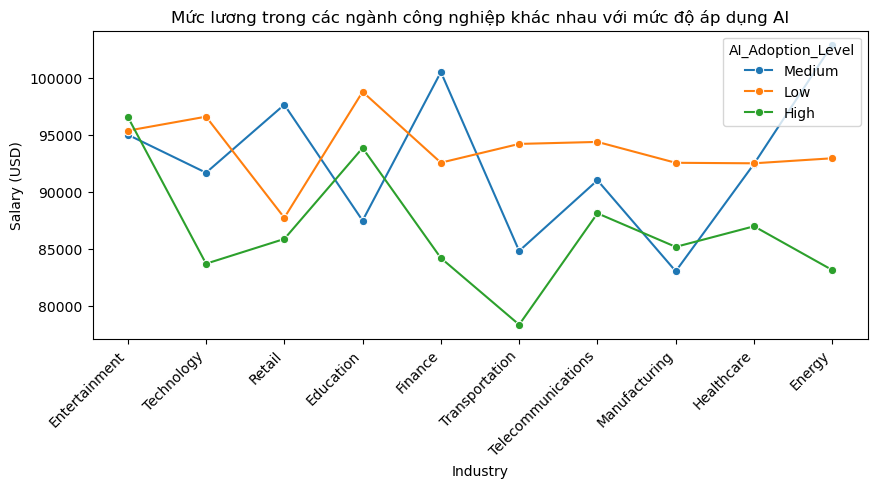

In [31]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_AI, x='Industry', y='Salary_USD', hue='AI_Adoption_Level', marker='o', ci=None)
plt.title('Mức lương trong các ngành công nghiệp khác nhau với mức độ áp dụng AI')
plt.xlabel('Industry')
plt.ylabel('Salary (USD)')
plt.xticks (rotation=45, ha='right')
plt.show()

<Figure size 1000x600 with 0 Axes>

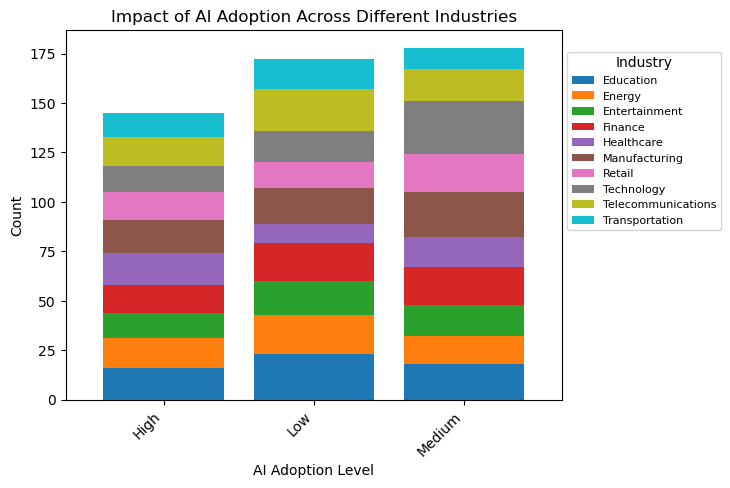

In [ ]:
# Grouping by AI Adoption Levels và Industry
ai_adoption_impact = df_AI.groupby(['AI_Adoption_Level', 'Industry']).size().unstack(fill_value=0)

#Vẽ biểu đồ cột chồng
plt.figure(figsize=(10, 6))
ai_adoption_impact.plot(kind='bar', stacked=True, width=0.8)
plt.title('Impact of AI Adoption Across Different Industries')

plt.xlabel('AI Adoption Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Industry', loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1), fontsize=8)
plt.show()

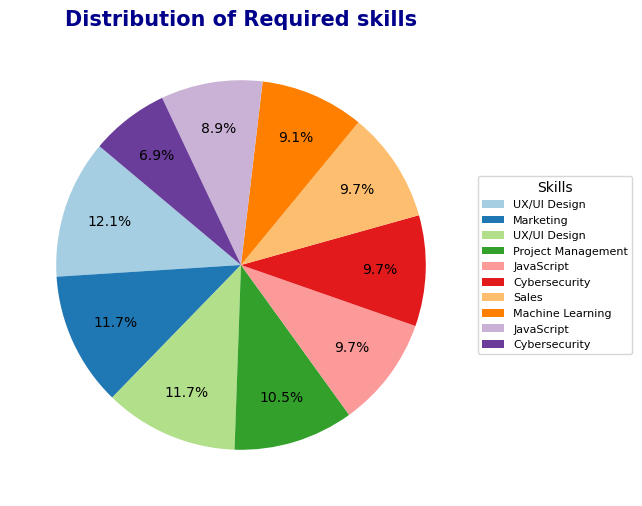

In [34]:
skill_counts = df_AI['Required_Skills'].value_counts()

# vẽ biểu đồ tròn
plt.figure(figsize=(10,6))
plt.pie(skill_counts, labels=None, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140, pctdistance=0.75)
plt.title('Distribution of Required skills', loc="center", fontsize=15, weight='bold', color='darkblue')
plt.legend(df_AI['Required_Skills'], title="Skills", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=8)

plt.show()

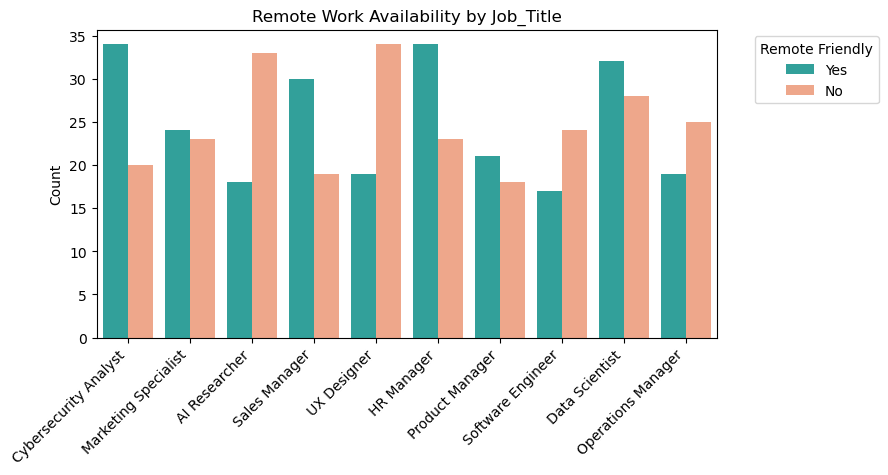

In [35]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_AI, x='Job_Title', hue='Remote_Friendly', palette={"#20b2aa","#ffa07a"})
plt.title('Remote Work Availability by Job_Title')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Friendly', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

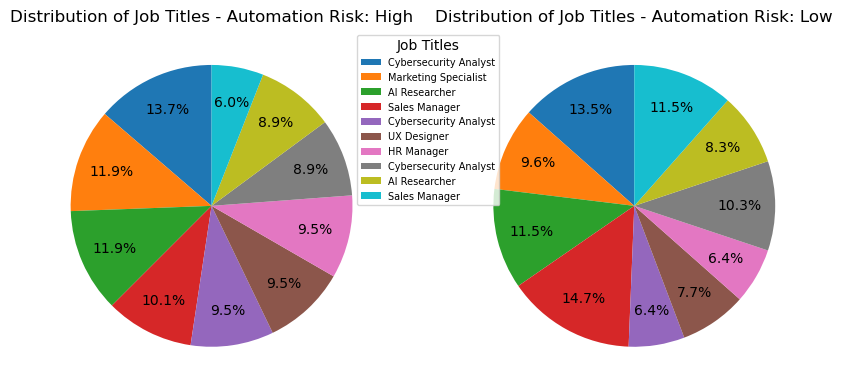

In [36]:
# Lọc dữ liệu cho Automation_Risk là 'High' và 'Low'
df_high = df_AI[df_AI['Automation_Risk'] == 'High']
high_counts = df_high['Job_Title'].value_counts()
df_low = df_AI[df_AI['Automation_Risk'] == 'Low']
low_counts = df_low['Job_Title'].value_counts()

# Đảm bảo thứ tự các miếng của biểu đồ giống nhau giữa High và Low
common_titles = high_counts.index.intersection(low_counts.index)
high_counts = high_counts[common_titles]
low_counts = low_counts[common_titles]
plt.figure(figsize=(10, 5))

# Biểu đồ tròn cho Automation_Risk = 'High'
plt.subplot(1, 2, 1)
plt.pie(high_counts, labels=None, autopct='%1.1f%%', startangle=90, pctdistance=0.75)
plt.title('Distribution of Job Titles - Automation Risk: High')

# Biểu đồ tròn cho Automation_Risk = 'Low'
plt.subplot(1, 2, 2)
plt.pie(low_counts, labels=None, autopct='%1.1f%%', startangle=90, pctdistance=0.75)
plt.title('Distribution of Job Titles - Automation Risk: Low')

plt.legend(df_AI['Job_Title'], title='Job Titles', loc='upper left', bbox_to_anchor=(-0.3, 1), fontsize=7)
plt.show()

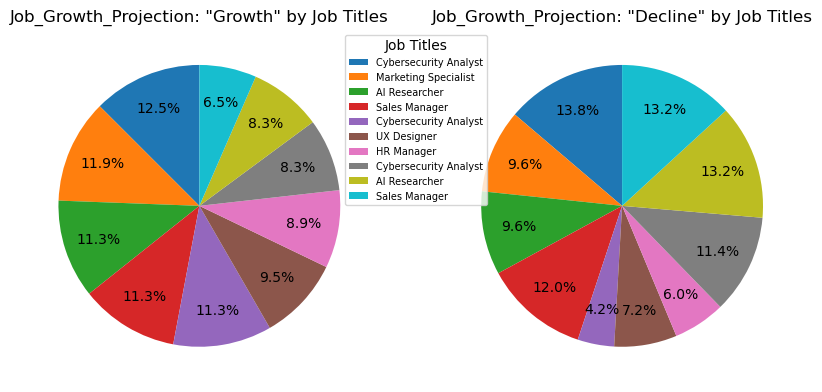

In [38]:
# Lọc dữ liệu cho Job_Growth_Projection là 'Growth' và 'Decline'
df_high = df_AI[df_AI ['Job_Growth_Projection'] == 'Growth']
high_counts = df_high['Job_Title'].value_counts()
df_low = df_AI [df_AI['Job_Growth_Projection'] == 'Decline']
low_counts = df_low['Job_Title'].value_counts()

# Đảm bảo thứ tự các miếng giống nhau giữa Growth và Decline
common_titles = high_counts.index.intersection(low_counts.index)
high_counts = high_counts [common_titles]
low_counts = low_counts [common_titles]

plt.figure(figsize=(10, 5))
# Biểu đồ tròn cho Job_Growth_Projection = 'Growth'
plt.subplot(1, 2, 1)
plt.pie(high_counts, labels=None, autopct='%1.1f%%', startangle=90, pctdistance=0.75)
plt.title('Job_Growth_Projection: "Growth" by Job Titles')

# Biểu đồ tròn cho Job_Growth_Projection = 'Decline'
plt.subplot(1, 2, 2)
plt.pie(low_counts, labels=None, autopct='%1.1f%%', startangle=90, pctdistance=0.75)
plt.title('Job_Growth_Projection: "Decline" by Job Titles')

plt.legend (df_AI['Job_Title'], title='Job Titles', loc='upper left', bbox_to_anchor=(-0.3, 1), fontsize=7)
plt.show()

**df jobs**

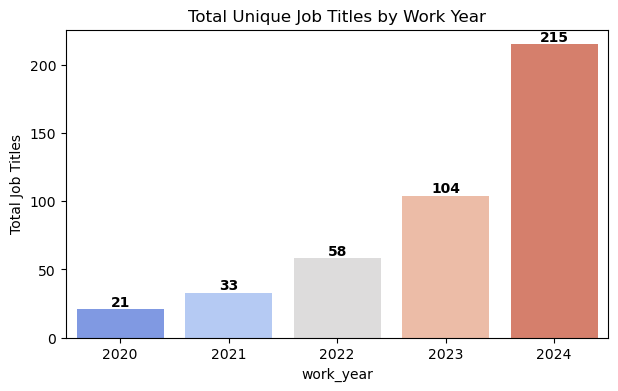

In [39]:
# Nhóm theo company_location và đếm số job_title
job_counts = df_jobs.groupby('work_year')['job_title'].nunique().reset_index()
job_counts = job_counts.sort_values(by='job_title', ascending=True)

#Tạo biểu đồ cột:
plt.figure(figsize=(7,4))
ax = sns.barplot(x='work_year', y='job_title', data=job_counts, palette='coolwarm')
for i, v in enumerate(job_counts['job_title']):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.ylabel('Total Job Titles')
plt.title('Total Unique Job Titles by Work Year')

plt.show()

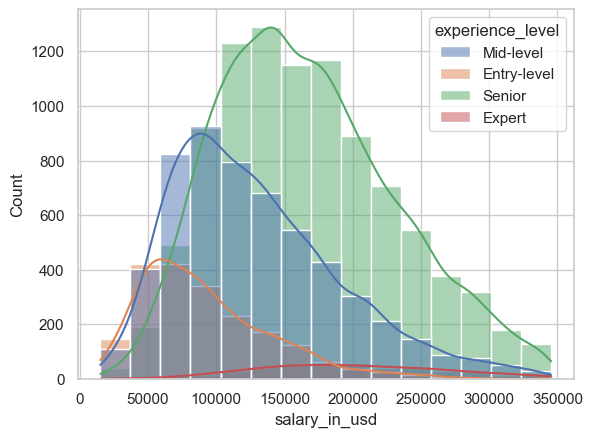

In [40]:
sns.set_theme(style="whitegrid")
fig = sns.histplot(df_jobs, x="salary_in_usd",
                   bins=15, kde=True, hue="experience_level")

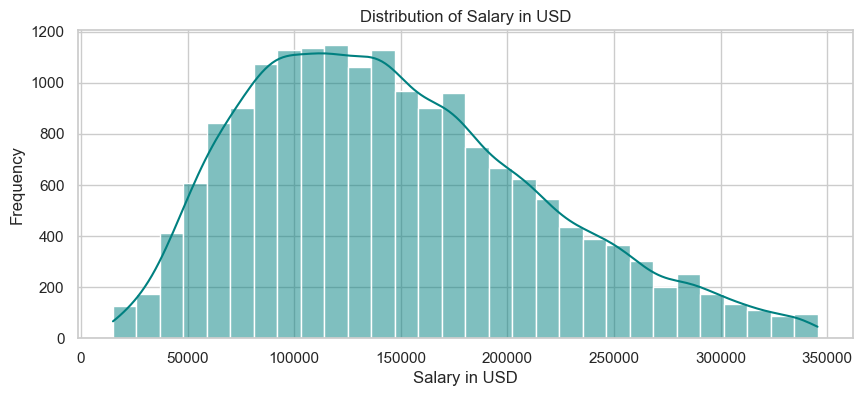

In [41]:
# Salary Distribution Analysis
plt.figure(figsize=(10,4))
sns.histplot(df_jobs['salary_in_usd'], kde=True, bins=30, color='teal')

plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

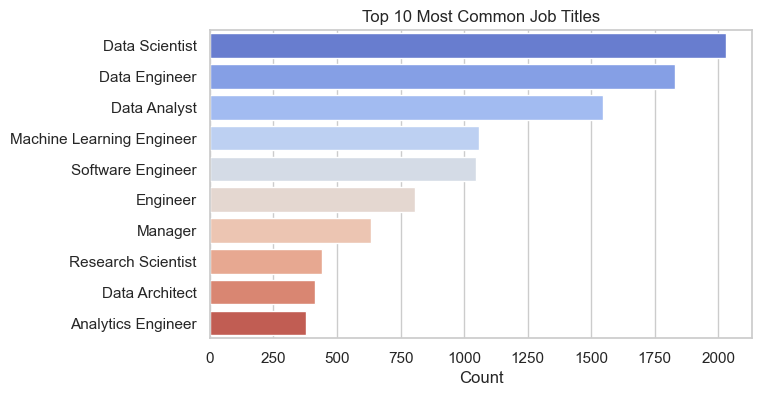

In [42]:
# Analyzing Job Titles
job_title_counts = df_jobs['job_title' ].value_counts().head(10)
# Top 10 job titles
plt.figure(figsize=(7,4))
sns.barplot(x=job_title_counts. values, y=job_title_counts.index, palette='coolwarm')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

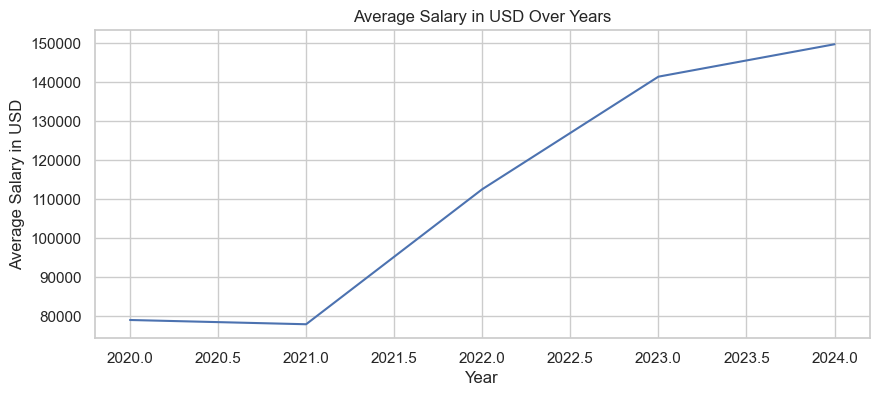

In [43]:
# Average salary by work year
average_salary_by_year = df_jobs.groupby('work_year') ['salary_in_usd'].mean()
plt.figure(figsize=(10, 4))
sns.lineplot(x=average_salary_by_year.index, y=average_salary_by_year.values)
plt.title('Average Salary in USD Over Years')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.show()

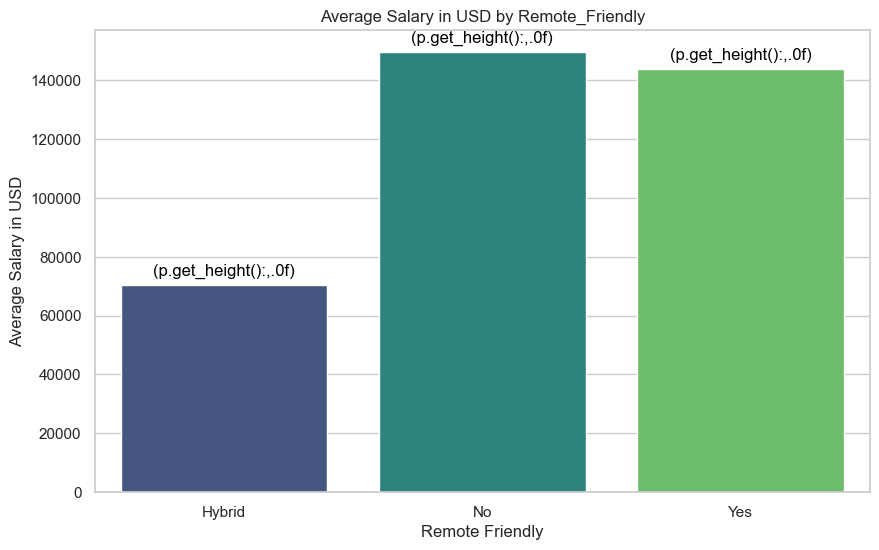

In [44]:
# Tính mức lương trung bình theo Remote Ratio
average_salary_by_remote_ratio = df_jobs.groupby('Remote_Friendly')['salary_in_usd'].mean()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_salary_by_remote_ratio.index, y=average_salary_by_remote_ratio.values, palette='viridis')
plt.title('Average Salary in USD by Remote_Friendly')
plt.xlabel('Remote Friendly')
plt.ylabel('Average Salary in USD')
for p in ax.patches:
    ax.annotate(f'(p.get_height():,.0f)', (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

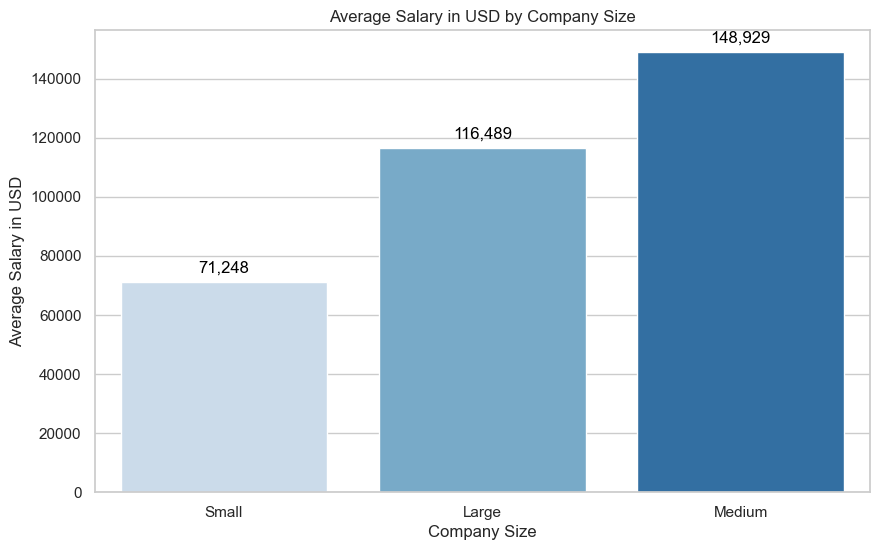

In [45]:
average_salary_by_company_size = df_jobs.groupby('company_size')['salary_in_usd'].mean().sort_values()
# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=average_salary_by_company_size.index, y=average_salary_by_company_size.values, palette='Blues')
plt.title('Average Salary in USD by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')
plt.show()

In [ ]:
#Tải file xuống
#df_AI.to_csv(r"C:\Users\LENOVO\OneDrive\Tài liệu DATA ANALYSTICS\DA_Final Project\Data sets\1. Project1_Data\AAII.csv")

**Load data to SQL by Python**

In [46]:
import sqlalchemy as sal
from sqlalchemy import create_engine, text as sql_text
from sqlalchemy.engine import URL

server = 'DESKTOP-K1HJHS9\SQLEXPRESS'
database = 'AI_Jobs_Analysis_240115'
username = ''
password = ''
schemas = ''

connection_string = "Driver={ODBC Driver 17 for SQL Server};Server=DESKTOP-K1HJHS9\SQLEXPRESS;Database=AI_Jobs_Analysis_240115;Trusted_Connection=yes;charset=UTF-8;"
connection_url = URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})
engine = create_engine(connection_url)

<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\S'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21848\121411804.py:5: SyntaxWarning: invalid escape sequence '\S'
  server = 'DESKTOP-K1HJHS9\SQLEXPRESS'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21848\121411804.py:11: SyntaxWarning: invalid escape sequence '\S'
  connection_string = "Driver={ODBC Driver 17 for SQL Server};Server=DESKTOP-K1HJHS9\SQLEXPRESS;Database=AI_Jobs_Analysis_240115;Trusted_Connection=yes;charset=UTF-8;"


In [ ]:
df_AI.to_sql('AI_Power', engine, if_exists='replace', index=False)
df_jobs.to_sql('AI_Jobs', engine, if_exists='replace', index=False)
df_Cities.to_sql('Cities', engine, if_exists='replace', index=False)